Text(0, 0.5, 'CHSH value')

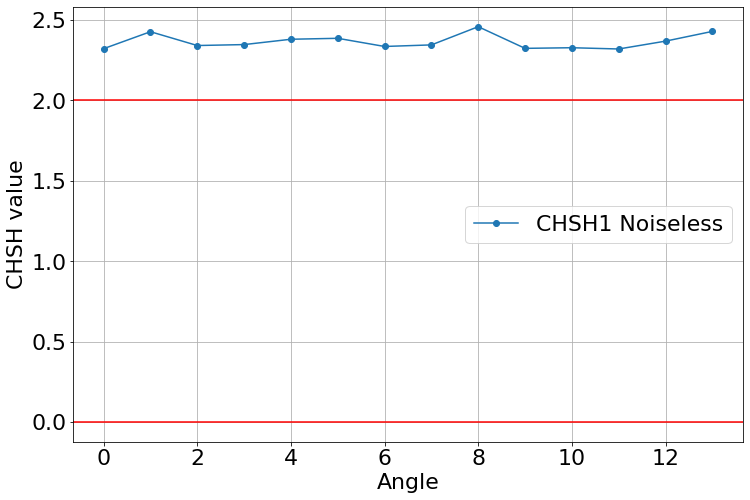

In [1]:
from qiskit import *
import numpy as np
from random import randint
%matplotlib inline
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
IBMQ.load_account()
simulator = Aer.get_backend('aer_simulator')




######Step_1######
#Creation of entaglement
def creation_of_qubits():
    qc = QuantumCircuit(2,2)
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    return qc


######Step_2######
###Creation of Alice and Bob basis
def apply_filters(qc):
    rand_A, rand_B = randint(1,3), randint(1,2)
    ###Alice Basis###
    if rand_A == 1:
        qc.i(0)
    elif rand_A == 2:
        qc.ry(-22.5,0)
    elif rand_A == 3:
        qc.ry(-67.5,0)
    ###Bob Basis###
    if rand_B == 1:
        qc.h(1)
    elif rand_B == 2:
        qc.ry(45, 1)
    qc.measure(range(2),range(2))
    return qc,rand_A, rand_B




######Step_3###### 
#Checking if Alice and Bob uses the same bases
secret_key = []
test_key = []
test_key1 = []
test_key2 = []
test_key3 = []
test_key4 = []

for i in range(100):
    qc, base_A, base_B = apply_filters(creation_of_qubits())
    if base_A == 1:
        secret_key.append(qc)
    elif base_A == 2 and base_B == 1:
        test_key1.append(qc)
    elif base_A == 2 and base_B == 2:
        test_key2.append(qc)
    elif base_A == 3 and base_B == 1:
        test_key3.append(qc)
    elif base_A == 3 and base_B == 2:
        test_key4.append(qc)
        
        
compare = [len(test_key1),len(test_key2),len(test_key3), len(test_key4)]

for i in range(min(compare)):
    test_key.append(test_key1[i])
    test_key.append(test_key2[i])
    test_key.append(test_key3[i])
    test_key.append(test_key4[i])
    
    
result_ideal = simulator.run(test_key).result() 
res = result_ideal.get_counts()


def compute_chsh_witness(res):
    CHSH = []
    for i in range(0, len(res), 4):
        chsh = 0
        for key,values in res[i].items():
            if key == '11' or key == '00':
                chsh -= values
            else:
                chsh += values
        for key,values in res[i+1].items():
            if key == '11' or key == '00':
                chsh -= values
            else:
                chsh += values
        for key,values in res[i+2].items():
            if key == '11' or key == '00':
                chsh -= values
            else:
                chsh += values
        for key,values in res[i+3].items():
            if key == '11' or key == '00':
                chsh += values
            else:
                chsh -= values
        CHSH.append(chsh/1024)
    return CHSH

CHSH1_ideal = compute_chsh_witness(res)


samples=[]
for i in range(len(CHSH1_ideal)):
    samples.append(i)
plt.figure(figsize=(12,8))
plt.rcParams.update({'font.size': 22})
plt.plot(samples,CHSH1_ideal,'o-',label = 'CHSH1 Noiseless')

plt.grid(which='major',axis='both')
plt.legend()
plt.axhline(y=2, color='r', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Angle')
plt.ylabel('CHSH value')
